In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set()

In [ ]:
# Read csv file and import into a dataframe
df = pd.read_csv('/content/amazon_and_sp500.csv')
df.head()

,DATE,AMZN_OPEN,AMZN_HIGH,AMZN_LOW,AMZN_CLOSE,AMZN_ADJ_CLOSE,AMZN_VOLUME,SP500_OPEN,SP500_HIGH,SP500_LOW,SP500_CLOSE,SP500_ADJ_CLOSE,SP500_VOLUME
0,1/3/2022,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
1,1/4/2022,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2,1/5/2022,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
3,1/6/2022,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
4,1/7/2022,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [ ]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             501 non-null    object 
 1   AMZN_OPEN        501 non-null    float64
 2   AMZN_HIGH        501 non-null    float64
 3   AMZN_LOW         501 non-null    float64
 4   AMZN_CLOSE       501 non-null    float64
 5   AMZN_ADJ_CLOSE   501 non-null    float64
 6   AMZN_VOLUME      501 non-null    int64  
 7   SP500_OPEN       501 non-null    float64
 8   SP500_HIGH       501 non-null    float64
 9   SP500_LOW        501 non-null    float64
 10  SP500_CLOSE      501 non-null    float64
 11  SP500_ADJ_CLOSE  501 non-null    float64
 12  SP500_VOLUME     501 non-null    int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 51.0+ KB


In [ ]:
# Convert the date field (which is in text) to a date/time type so we can work with it. Set the date column as the "key", or index
df.DATE = pd.to_datetime(df.DATE)
df.set_index('DATE', inplace=True)

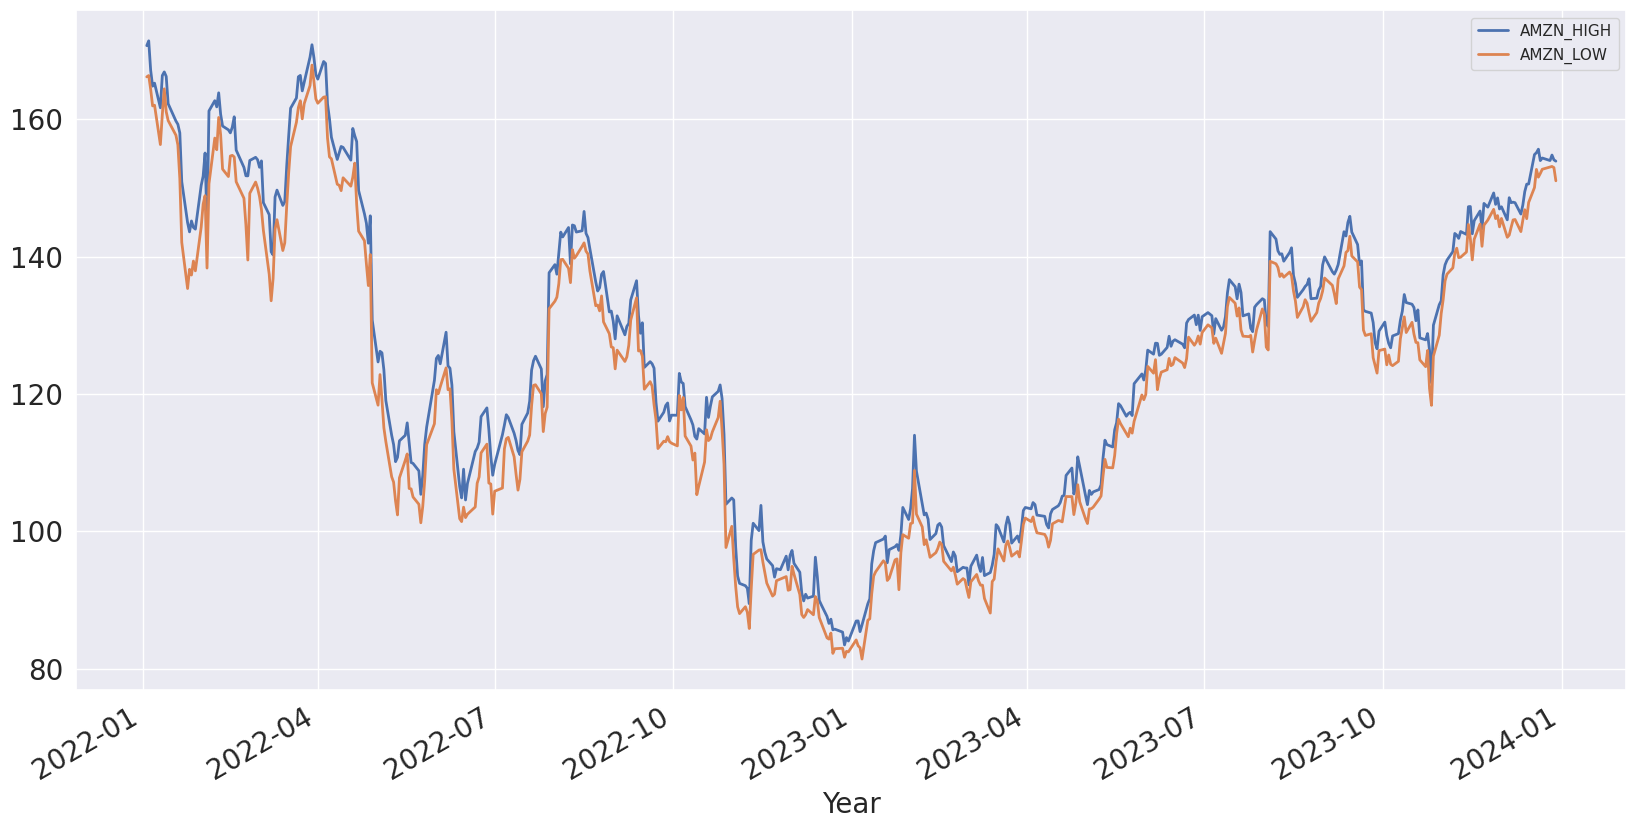

In [ ]:
# Plot a line chart of Amazon daily high and low price.
df[['AMZN_HIGH', 'AMZN_LOW']].plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [ ]:
# Calculate the rolling 30-day mean of the trading volume and a 2 standard deviation upper and lower band around the mean.
df['AMZN_Rolling_Mean'] = df['AMZN_VOLUME'].rolling(window=30).mean()


df['Upper_Band'] = df['AMZN_Rolling_Mean'] + 2 * df['AMZN_VOLUME'].rolling(window=30).std()
df['Lower_Band'] = df['AMZN_Rolling_Mean'] - 2 * df['AMZN_VOLUME'].rolling(window=30).std()

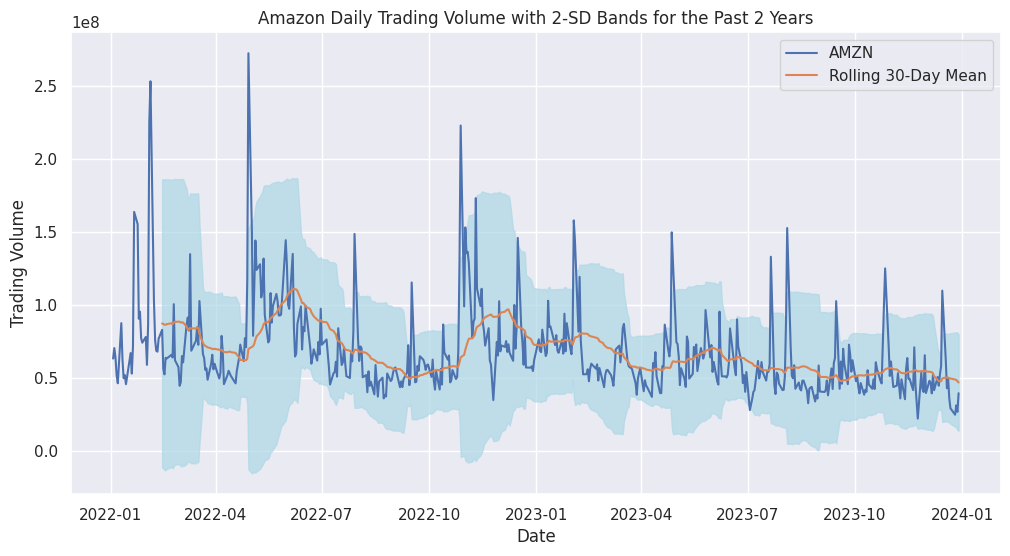

In [ ]:
# Plot the Amazon trading volume for the last 2 years and overlay with 2-SD bands
plt.figure(figsize=(12, 6))
plt.plot(df['AMZN_VOLUME'], label='AMZN')
plt.plot(df['AMZN_Rolling_Mean'], label='Rolling 30-Day Mean')
plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], color='lightblue', alpha=0.7)

# Label the chart
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Amazon Daily Trading Volume with 2-SD Bands for the Past 2 Years')
plt.legend()
plt.show()

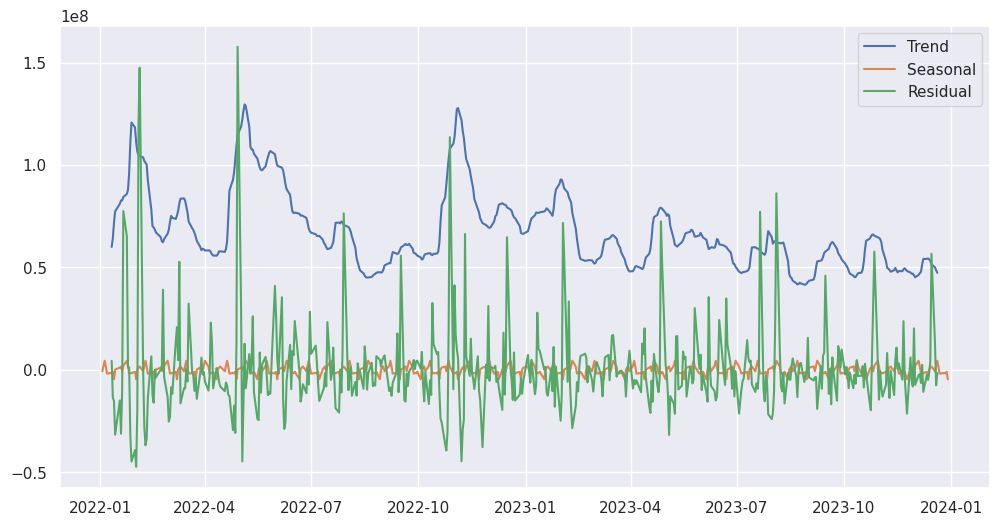

In [ ]:
# Check for seasonality trend in the time series of the trading volume

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['AMZN_VOLUME'], period=12, model='additive')

# Plot the trend, seasonal, and residual components
plt.figure(figsize=(12, 6))
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Residual'])
plt.show()